In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [30]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [32]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [33]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine)

In [34]:
# Print all of the classes mapped to the Base
print(Base.classes.keys())


['station', 'measurement']


In [36]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`

Measurement = Base.classes.measurement

Station = Base.classes.station


In [64]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [143]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(sqlalchemy.desc(Measurement.date)).limit(1).all()[0].date

# most_recent_date = session.query(Measurement.date).limit(10)

In [144]:
# for date in most_recent_date:
#     print(date.date)

print(most_recent_date)


2017-08-23


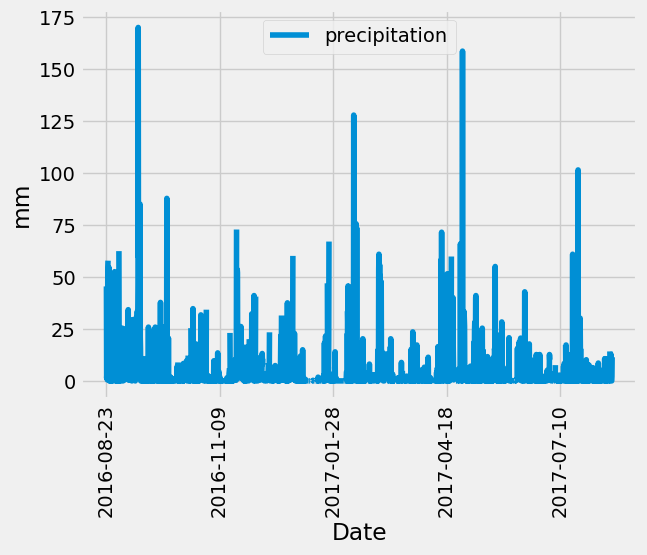

In [145]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")
date_one_year_ago = most_recent_date - dt.timedelta(days=365)
date_one_year_ago = date_one_year_ago.date()
# print(date_one_year_ago)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(date_one_year_ago, most_recent_date)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
# Plot the data
precipitation_df.plot(x='date', y='prcp')

plt.xlabel('Date')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.legend(['precipitation'])

# Show the plot
plt.show()


In [146]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df.describe()
summary_stats

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [152]:
# Design a query to calculate the total number of stations in the dataset
num_of_stations = session.query(func.count(func.distinct(Measurement.station))).scalar()

print('Total number of stations: ', num_of_stations)

Total number of stations:  9


In [155]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for row in station_count:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [164]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_count[0][0]

temp = []

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()

temp.append((lowest_temp, highest_temp, average_temp))

print(temp)

[(12.2, 29.4, 22.03582251082252)]


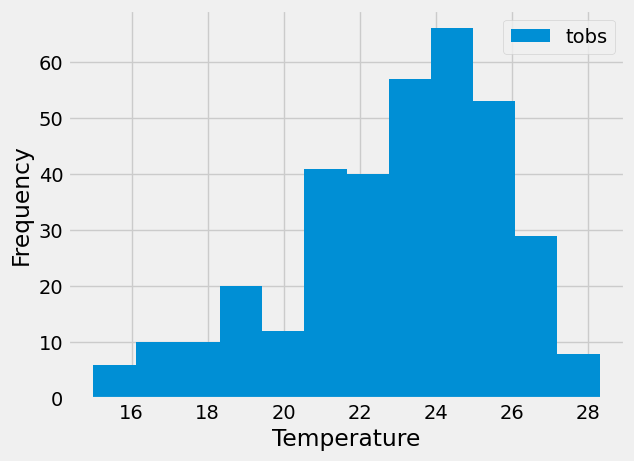

In [172]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date.between(date_one_year_ago, most_recent_date)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temp_df = pd.DataFrame(temp_data)

# Sort the dataframe by date
temp_df = temp_df.sort_values(by='date')

plt.hist(temp_df['tobs'], bins=12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()


# Close Session

In [173]:
# Close Session
session.close()
